# Actverse Analysis

## 1. actverse analysis 설치

In [1]:
"""colab setup"""
! pip install actverse@git+https://github.com/actnova-inc/actverse-analysis

"""local setup"""
# ! pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/actnova-inc/actverse-analysis to /tmp/pip-install-ji5oe46u/actverse_d07fc70c645d47a5998cdc1f8b2f67d8
  Running command git clone --filter=blob:none --quiet https://github.com/actnova-inc/actverse-analysis /tmp/pip-install-ji5oe46u/actverse_d07fc70c645d47a5998cdc1f8b2f67d8
  Resolved https://github.com/actnova-inc/actverse-analysis to commit ec27cb6f4389b2f4177e03e5a2475525e595c6db
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for actverse: filename=actverse-0.1.0-py3-none-any.whl size=5802 sha256=f2ae52a63c72b46b97d8d28cd7de82dcc0081801147fc0f112843b5284dc59cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-0qcj7bni/wheels/ca/7a/6a/a169c711e45884e2e852910ebe05d299ea65ff5e4f90bf5cd1
Successfully built act

## 1. actverse 결과 로드
actverse-web으로 부터 얻은 prediction url 또는 로컬 파일의 경로를 입력

In [2]:
from actverse.utils import load_json

json_path = input("Downloadable url or local file path:")

prediction = load_json(json_path)

## 2. 분석

actverse-web부터 얻은 결과로 분석 수행


In [3]:
from actverse.analysis import measure_physical_metrics

metrics, ids = measure_physical_metrics(prediction)

## 3. 시각화

이동 metrics 시각화 - 속력, 누적 이동 거리, 평균 속도 등

In [4]:
img_width = prediction["metadata"]["origin_width"]
img_height = prediction["metadata"]["origin_height"]

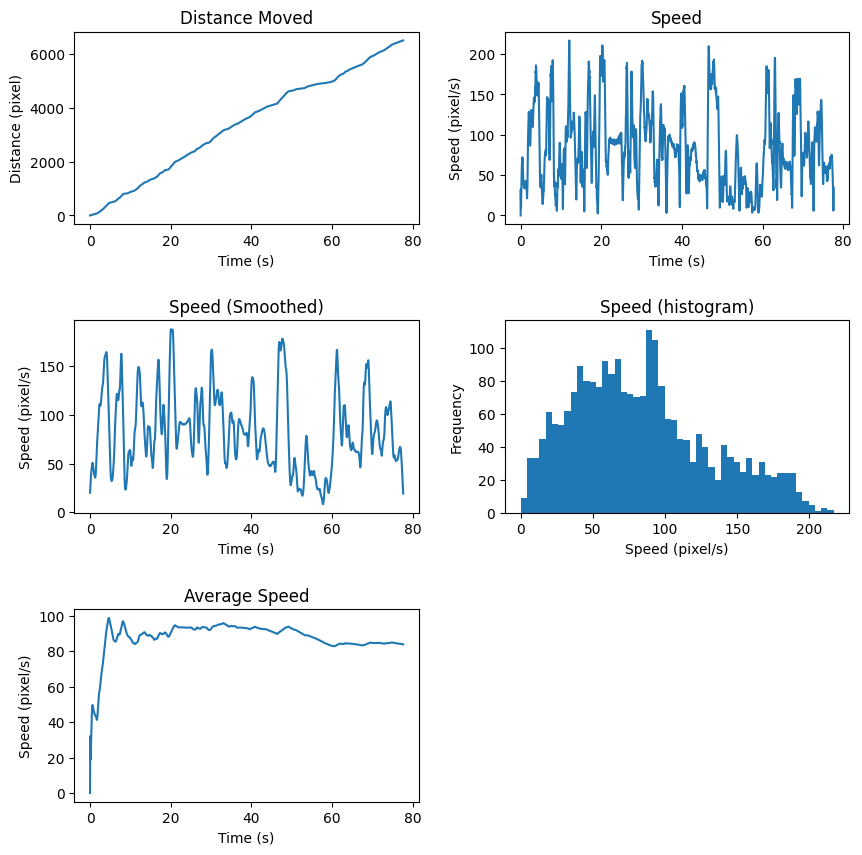

In [5]:
import matplotlib.pyplot as plt

from actverse.utils import moving_average

mouse_id = ids[0]
plt.figure(f"movement-{mouse_id}", figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

n_rows, n_cols = 3, 2
plt.subplot(n_rows, n_cols, 1)
plt.title("Distance Moved")
plt.plot(
    metrics[mouse_id]["timestamp"], metrics[mouse_id]["cumulative_distance_change"]
)
plt.ylabel("Distance (pixel)")
plt.xlabel("Time (s)")

plt.subplot(n_rows, n_cols, 2)
plt.title("Speed")
plt.plot(metrics[mouse_id]["timestamp"], metrics[mouse_id]["speed"])
plt.ylabel("Speed (pixel/s)")
plt.xlabel("Time (s)")

plt.subplot(n_rows, n_cols, 3)
plt.title("Speed (Smoothed)")
smoothed_speed = moving_average(metrics[mouse_id]["speed"], 25)
plt.plot(metrics[mouse_id]["timestamp"], smoothed_speed)
plt.ylabel("Speed (pixel/s)")
plt.xlabel("Time (s)")

plt.subplot(n_rows, n_cols, 4)
plt.title("Speed (histogram)")
plt.hist(metrics[mouse_id]["speed"], bins=50)
plt.xlabel("Speed (pixel/s)")
plt.ylabel("Frequency")

plt.subplot(n_rows, n_cols, 5)
plt.title("Average Speed")
plt.plot(metrics[mouse_id]["timestamp"], metrics[mouse_id]["average_speed"])
plt.ylabel("Speed (pixel/s)")
plt.xlabel("Time (s)")


plt.show()

방향 metrics 시각화 - 각도, 누적 각도 변화, 각속도

Text(0.5, 0, 'Time (s)')

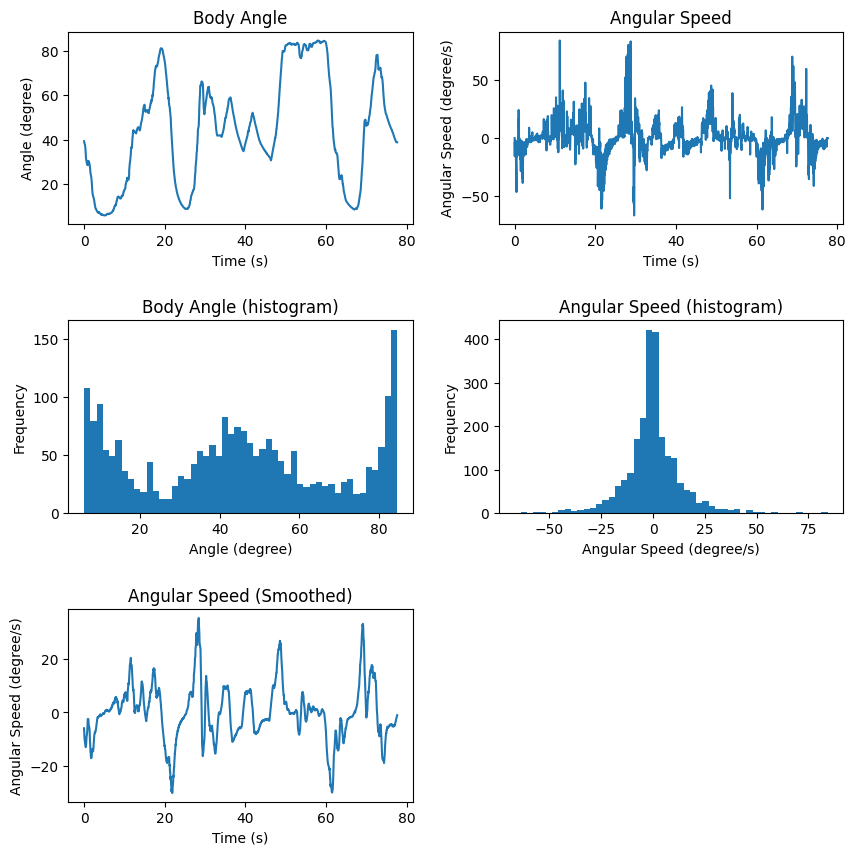

In [6]:
mouse_id = ids[0]
plt.figure(f"angle-{mouse_id}", figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.25)

n_rows, n_cols = 3, 2
plt.subplot(n_rows, n_cols, 1)
plt.title("Body Angle")
plt.plot(metrics[mouse_id]["timestamp"], metrics[mouse_id]["angle"])
plt.ylabel("Angle (degree)")
plt.xlabel("Time (s)")

plt.subplot(n_rows, n_cols, 2)
plt.title("Angular Speed")
plt.plot(metrics[mouse_id]["timestamp"], metrics[mouse_id]["angular_speed"])
plt.ylabel("Angular Speed (degree/s)")
plt.xlabel("Time (s)")

plt.subplot(n_rows, n_cols, 3)
plt.title("Body Angle (histogram)")
plt.hist(metrics[mouse_id]["angle"], bins=50)
plt.xlabel("Angle (degree)")
plt.ylabel("Frequency")

plt.subplot(n_rows, n_cols, 4)
plt.title("Angular Speed (histogram)")
plt.hist(metrics[mouse_id]["angular_speed"], bins=50)
plt.xlabel("Angular Speed (degree/s)")
plt.ylabel("Frequency")

plt.subplot(n_rows, n_cols, 5)
plt.title("Angular Speed (Smoothed)")
smoothed_angular_speed = moving_average(metrics[mouse_id]["angular_speed"], 25)
plt.plot(metrics[mouse_id]["timestamp"], smoothed_angular_speed)
plt.ylabel("Angular Speed (degree/s)")
plt.xlabel("Time (s)")

위치 metrics 시각화 - trajectory 및 히트맵

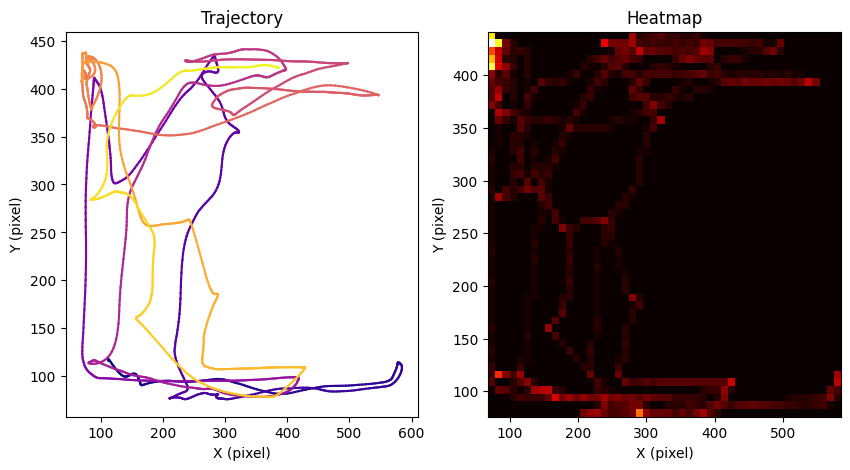

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def plot_lines(points, cmap_name="plasma"):
    cmap = plt.get_cmap(cmap_name, len(points))  # 컬러맵 설정

    for i in range(len(points) - 1):
        x0, y0 = points[i]
        x1, y1 = points[i + 1]
        color = cmap(i)
        plt.plot([x0, x1], [y0, y1], linestyle="-", color=color)


mouse_id = ids[0]
plt.figure(f"position-{mouse_id}", figsize=(10, 5))

n_rows, n_cols = 1, 2
plt.subplot(n_rows, n_cols, 1)
plt.title("Trajectory")

plot_lines(metrics[mouse_id]["position"])
plt.xlabel("X (pixel)")
plt.ylabel("Y (pixel)")

plt.subplot(n_rows, n_cols, 2)
plt.title("Heatmap")
positions = np.array(metrics[mouse_id]["position"])
plt.hist2d(
    positions[:, 0],
    positions[:, 1],
    bins=50,
    cmap="hot",
)
plt.xlabel("X (pixel)")
plt.ylabel("Y (pixel)")

plt.show()